In [542]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import itertools as it
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.model_selection import cross_val_score



# df.shape
# df.head()

In [543]:
df = pd.read_csv("train.csv")
dfTest = pd.read_csv("test.csv")
target = df['Survived']
passId = dfTest['PassengerId']
dfTest.drop(['PassengerId', 'Ticket'], axis =1, inplace = True)




quasiConst = [col for col in df.columns if  ((df[col].dtype == 'int64' or df[col].dtype == 'float64') and df[col].std() == 0) or (df[col].dtype == 'object' and len(df[col].unique()) == 1 )]
print(len(quasiConst))
quasiConst

0


[]

In [572]:
df.head(10)
dfTest.head(30)


,Pclass,Name,Age,SibSp,Parch,Fare,Cabin,Embarked,Female
0,3,0.156673,8,1,0,1,0.299854,0.339009,0
1,1,0.792000,13,1,0,4,0.593220,0.553571,1
2,3,0.697802,9,0,0,1,0.299854,0.339009,1
3,1,0.792000,12,1,0,3,0.593220,0.339009,1
4,3,0.156673,12,0,0,1,0.299854,0.339009,0
5,3,0.156673,10,0,0,1,0.299854,0.389610,0
6,1,0.156673,18,0,0,3,0.750000,0.339009,0
7,3,0.575000,1,3,1,2,0.299854,0.339009,0
8,3,0.792000,9,0,2,1,0.299854,0.339009,1
9,2,0.792000,5,1,0,2,0.299854,0.553571,1


,Pclass,Name,Age,SibSp,Parch,Fare,Cabin,Embarked,Female
0,3,0.156673,12,0,0,1,0.299854,0.389610,0
1,3,0.792000,16,1,0,1,0.299854,0.339009,1
2,2,0.156673,21,0,0,1,0.299854,0.389610,0
3,3,0.156673,9,0,0,1,0.299854,0.339009,0
4,3,0.792000,8,1,1,1,0.299854,0.339009,1
5,3,0.156673,5,0,0,1,0.299854,0.339009,0
6,3,0.697802,10,0,0,1,0.299854,0.389610,1
7,2,0.156673,9,1,1,2,0.299854,0.339009,0
8,3,0.792000,6,0,0,1,0.299854,0.553571,1
9,3,0.156673,7,2,0,2,0.299854,0.339009,0


In [545]:
df.isnull().sum()
dfTest.isnull().sum()

dfTest[dfTest['Age'].isnull()]

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
10,3,"Ilieff, Mr. Ylio",male,NaN,0,0,7.8958,NaN,S
22,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,31.6833,NaN,S
29,3,"Samaan, Mr. Elias",male,NaN,2,0,21.6792,NaN,C
33,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,23.4500,NaN,S
36,3,"Roth, Miss. Sarah A",female,NaN,0,0,8.0500,NaN,S
39,3,"Hee, Mr. Ling",male,NaN,0,0,56.4958,NaN,S
41,1,"Franklin, Mr. Thomas Parham",male,NaN,0,0,26.5500,D34,S
47,3,"Shaughnessy, Mr. Patrick",male,NaN,0,0,7.7500,NaN,Q
54,2,"Mangiavacchi, Mr. Serafino Emilio",male,NaN,0,0,15.5792,NaN,C
58,3,"Davison, Mr. Thomas Henry",male,NaN,1,0,16.1000,NaN,S


In [546]:
df['Cabin'].fillna('Missing', inplace=True)
print df.isnull().sum()
df['Cabin'] = df['Cabin'].astype(str).str[0]
dictMon = df.groupby(['Cabin'])['Survived'].mean().to_dict()
df['Cabin'] = df['Cabin'].map(dictMon)

dfTest['Cabin'].fillna('Missing', inplace=True)
dfTest['Cabin'] = dfTest['Cabin'].astype(str).str[0]
dfTest['Cabin'] = dfTest['Cabin'].map(dictMon)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,0.744681,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,0.744681,NaN


S    644
C    168
Q     77
Name: Embarked, dtype: int64

S    646
C    168
Q     77
Name: Embarked, dtype: int64

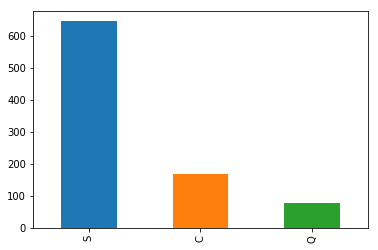

In [547]:
df.loc[df['Embarked'].isnull()]
df['Embarked'].value_counts().sort_values(ascending=False)
domVal = df['Embarked'].value_counts().sort_values(ascending=False).index[0]
df['Embarked'].fillna(value=domVal, inplace = True)
df['Embarked'].value_counts().sort_values(ascending=False)
df['Embarked'].value_counts(dropna = False).sort_values(ascending=False).plot(kind='bar')

In [548]:
dEmb = df.groupby(['Embarked'])['Survived'].mean().to_dict()
df['Embarked'] = df['Embarked'].map(dEmb)
dfTest['Embarked'] = dfTest['Embarked'].map(dEmb)

In [549]:
len(df['Ticket'].unique())
df.drop(['Ticket'], inplace = True, axis = 1)
df.head()

681

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,0.299854,0.339009
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,0.593220,0.553571
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,0.299854,0.339009
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,0.593220,0.339009
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,0.299854,0.339009


In [550]:
df['Fare'].value_counts().sort_index()
plt.show()
lstBins = [-1, 20, 40, 60, 80, 100, 150, 1000]
df['Fare'] = pd.cut(df['Fare'], bins = lstBins, labels = range(1, len(lstBins)))

dfTest['Fare'].value_counts().sort_index()
dfTest['Fare'] = dfTest['Fare'].fillna(df['Fare'].value_counts().sort_values(ascending=False).index[0])
dfTest['Fare'] = pd.cut(dfTest['Fare'], bins = lstBins, labels = range(1, len(lstBins)))


0.0000      15
4.0125       1
5.0000       1
6.2375       1
6.4375       1
6.4500       1
6.4958       2
6.7500       2
6.8583       1
6.9500       1
6.9750       2
7.0458       1
7.0500       7
7.0542       2
7.1250       4
7.1417       1
7.2250      12
7.2292      15
7.2500      13
7.3125       1
7.4958       3
7.5208       1
7.5500       4
7.6292       1
7.6500       4
7.7250       1
7.7292       1
7.7333       4
7.7375       2
7.7417       1
            ..
80.0000      2
81.8583      1
82.1708      2
83.1583      3
83.4750      2
86.5000      3
89.1042      2
90.0000      4
91.0792      2
93.5000      2
106.4250     2
108.9000     2
110.8833     4
113.2750     3
120.0000     4
133.6500     2
134.5000     2
135.6333     3
146.5208     2
151.5500     4
153.4625     3
164.8667     2
211.3375     3
211.5000     1
221.7792     1
227.5250     4
247.5208     2
262.3750     2
263.0000     4
512.3292     3
Name: Fare, Length: 248, dtype: int64

0.0000       2
3.1708       1
6.4375       2
6.4958       1
6.9500       1
7.0000       2
7.0500       2
7.2250       9
7.2292       9
7.2500       5
7.2833       1
7.5500       4
7.5750       1
7.5792       1
7.6292       1
7.6500       2
7.7208       1
7.7250       1
7.7333       3
7.7500      21
7.7750      10
7.7792       1
7.7958       4
7.8208       1
7.8292       1
7.8500       1
7.8542       8
7.8792       6
7.8875       1
7.8958      11
            ..
65.0000      3
69.5500      4
71.2833      1
73.5000      2
75.2417      2
75.2500      1
76.2917      1
78.8500      1
79.2000      2
81.8583      2
82.2667      2
83.1583      3
90.0000      1
93.5000      2
106.4250     1
108.9000     1
134.5000     3
135.6333     1
136.7792     2
146.5208     1
151.5500     2
164.8667     2
211.3375     1
211.5000     4
221.7792     3
227.5250     1
247.5208     1
262.3750     5
263.0000     2
512.3292     1
Name: Fare, Length: 169, dtype: int64

In [551]:
df['Name'] = df['Name'].str.split('[,.]').str[1]
names = list(df['Name'].unique())
print 'train, ' , names

dfTest['Name'] = dfTest['Name'].str.split('[,.]').str[1]
namesTest = list(dfTest['Name'].unique())
print 'test, ' , namesTest

train,  [' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme', ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt', ' the Countess', ' Jonkheer']
test,  [' Mr', ' Mrs', ' Miss', ' Master', ' Ms', ' Col', ' Rev', ' Dr', ' Dona']


In [552]:
# for col in ['SibSp' , 'Parch']:
#     plt.show()
#     df.groupby([col])['Survived'].mean().plot(kind='bar')

In [553]:
# dAge = df.groupby('Name')['Age'].median()
# df['Age_'] = df['Age'].fillna(df['Age'].map(dAge))
# dfTest['Age_'] = dfTest['Age'].fillna(dfTest['Age'].map(dAge))
dfTest['Age'].isnull().sum()
df['Age'] = df.groupby(['Name'])['Age'].apply(lambda x: x.fillna(x.median()))
dfTest['Age'] = dfTest.groupby(['Name'])['Age'].apply(lambda x: x.fillna(x.median()))

val = dfTest['Age'].value_counts().sort_values(ascending=False).index[0]
dfTest['Age'] = dfTest['Age'].fillna(val)

dfTest['Age'].isnull().sum()

df.head(20)
dfTest.head(20)

86

0

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,Mr,male,22.0,1,0,1,0.299854,0.339009
1,2,1,1,Mrs,female,38.0,1,0,4,0.593220,0.553571
2,3,1,3,Miss,female,26.0,0,0,1,0.299854,0.339009
3,4,1,1,Mrs,female,35.0,1,0,3,0.593220,0.339009
4,5,0,3,Mr,male,35.0,0,0,1,0.299854,0.339009
5,6,0,3,Mr,male,30.0,0,0,1,0.299854,0.389610
6,7,0,1,Mr,male,54.0,0,0,3,0.750000,0.339009
7,8,0,3,Master,male,2.0,3,1,2,0.299854,0.339009
8,9,1,3,Mrs,female,27.0,0,2,1,0.299854,0.339009
9,10,1,2,Mrs,female,14.0,1,0,2,0.299854,0.553571


,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,Mr,male,34.5,0,0,1,0.299854,0.389610
1,3,Mrs,female,47.0,1,0,1,0.299854,0.339009
2,2,Mr,male,62.0,0,0,1,0.299854,0.389610
3,3,Mr,male,27.0,0,0,1,0.299854,0.339009
4,3,Mrs,female,22.0,1,1,1,0.299854,0.339009
5,3,Mr,male,14.0,0,0,1,0.299854,0.339009
6,3,Miss,female,30.0,0,0,1,0.299854,0.389610
7,2,Mr,male,26.0,1,1,2,0.299854,0.339009
8,3,Mrs,female,18.0,0,0,1,0.299854,0.553571
9,3,Mr,male,21.0,2,0,2,0.299854,0.339009


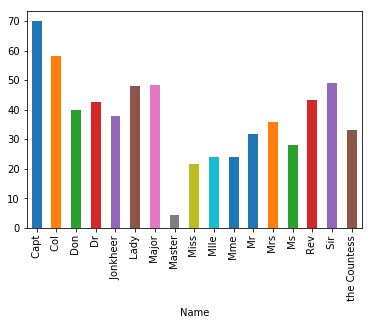

In [554]:
df.groupby('Name')['Age'].mean().plot(kind='bar')
plt.show()
#dfTest.groupby('Name')['Age'].mean().plot(kind='bar')

In [555]:
dNameSurv = df.groupby(['Name'])['Survived'].mean().to_dict()
dNameSurv
df['Name'] = df['Name'].map(dNameSurv)
dfTest['Name'] = dfTest['Name'].map(dNameSurv)
df['Name'].median()

dfTest['Name'] = dfTest['Name'].fillna(df['Name'].value_counts().sort_values(ascending=False).index[0])

{' Capt': 0.0,
 ' Col': 0.5,
 ' Don': 0.0,
 ' Dr': 0.42857142857142855,
 ' Jonkheer': 0.0,
 ' Lady': 1.0,
 ' Major': 0.5,
 ' Master': 0.575,
 ' Miss': 0.6978021978021978,
 ' Mlle': 1.0,
 ' Mme': 1.0,
 ' Mr': 0.15667311411992263,
 ' Mrs': 0.792,
 ' Ms': 1.0,
 ' Rev': 0.0,
 ' Sir': 1.0,
 ' the Countess': 1.0}

0.15667311411992263

In [556]:
# dNamesMap = {}
# diffNames = list(set(names + namesTest))
# for n in diffNames:
#     if n in [' Miss', ' Mrs', ' Mr', ' Ms']:
#         dNamesMap[n] = 1
#     elif n in [' Mme', ' Mlle', ' Major', ' Col', ' Dr', ' Rev']:
#         dNamesMap[n] = 2
#     else:
#         dNamesMap[n] = 3
        
# df['Name'] = df['Name'].map(dNamesMap)
# dfTest['Name'] = dfTest['Name'].map(dNamesMap)

In [557]:
#df['Age'] = df.groupby(['Name'])['Age'].apply(lambda x: x.fillna(x.median()))

In [558]:
df['Female'] = np.where(df['Sex'] == 'female', 1, 0)
df.drop(['Sex'], inplace = True, axis = 1)

dfTest['Female'] = np.where(dfTest['Sex'] == 'female', 1, 0)
dfTest.drop(['Sex'], inplace = True, axis = 1)

In [559]:
quasConstVars = []
for col in df.columns:
    domVal = (df[col].value_counts() / float(len(df))).sort_values(ascending=False).values[0]
    print col, domVal
    if domVal > .9:
        quasConstVars.append(col)
quasConstVars

PassengerId 0.001122334455667789
Survived 0.6161616161616161
Pclass 0.5510662177328844
Name 0.5802469135802469
Age 0.16161616161616163
SibSp 0.6823793490460157
Parch 0.7609427609427609
Fare 0.5780022446689114
Cabin 0.7710437710437711
Embarked 0.7250280583613917
Female 0.6475869809203143


[]

In [560]:
df.drop(['Survived', 'PassengerId'] , axis = 1, inplace = True)

In [561]:
for col in df.columns:
    print col
    #plt.show()
    #df[col].value_counts().sort_index(ascending=True).plot(kind='bar')
    df[col].value_counts().sort_index(ascending=True)

Pclass


1    216
2    184
3    491
Name: Pclass, dtype: int64

Name


0.000000      9
0.156673    517
0.428571      7
0.500000      4
0.575000     40
0.697802    182
0.792000    125
1.000000      7
Name: Name, dtype: int64

Age


0.42      1
0.67      1
0.75      2
0.83      2
0.92      1
1.00      7
2.00     10
3.00      6
3.50      4
4.00     10
5.00      4
6.00      3
7.00      3
8.00      4
9.00      8
10.00     2
11.00     4
12.00     1
13.00     2
14.00     6
14.50     1
15.00     5
16.00    17
17.00    13
18.00    26
19.00    25
20.00    15
20.50     1
21.00    60
22.00    27
         ..
45.00    12
45.50     2
46.00     3
46.50     1
47.00     9
48.00     9
49.00     6
50.00    10
51.00     7
52.00     6
53.00     1
54.00     8
55.00     2
55.50     1
56.00     4
57.00     2
58.00     5
59.00     2
60.00     4
61.00     3
62.00     4
63.00     2
64.00     2
65.00     3
66.00     1
70.00     2
70.50     1
71.00     2
74.00     1
80.00     1
Name: Age, Length: 90, dtype: int64

SibSp


0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64

Parch


0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64

Fare


1    515
2    200
3     54
4     48
5     21
6     24
7     29
Name: Fare, dtype: int64

Cabin


0.000000      1
0.299854    687
0.466667     15
0.500000      4
0.593220     59
0.615385     13
0.744681     47
0.750000     32
0.757576     33
Name: Cabin, dtype: int64

Embarked


0.339009    646
0.389610     77
0.553571    168
Name: Embarked, dtype: int64

Female


0    577
1    314
Name: Female, dtype: int64

In [562]:
dfTest['Age'].value_counts().sort_index()

0.17      1
0.33      1
0.75      1
0.83      1
0.92      1
1.00      3
2.00      2
3.00      1
5.00      1
6.00      3
7.00      5
8.00      2
9.00      2
10.00     2
11.50     1
12.00     2
13.00     3
14.00     2
14.50     1
15.00     1
16.00     2
17.00     7
18.00    13
18.50     3
19.00     4
20.00     8
21.00    17
22.00    30
22.50     1
23.00    11
         ..
38.00     3
38.50     1
39.00     6
40.00     5
40.50     1
41.00     5
42.00     5
43.00     4
44.00     1
45.00     9
46.00     3
47.00     5
48.00     5
49.00     3
50.00     5
51.00     1
53.00     3
54.00     2
55.00     6
57.00     3
58.00     1
59.00     1
60.00     3
60.50     1
61.00     2
62.00     1
63.00     2
64.00     3
67.00     1
76.00     1
Name: Age, Length: 79, dtype: int64

In [563]:
dfTest.head(10)
binAge = [-1] + [3*n for n in range(1,30)]

len(range(1,18))
len(binAge)
df['Age'] = pd.cut(df.Age, bins = binAge, labels = range(1,len(binAge)))
dfTest['Age'] = pd.cut(dfTest.Age, bins = binAge, labels = range(1,len(binAge)))
dfTest.head(10)

,Pclass,Name,Age,SibSp,Parch,Fare,Cabin,Embarked,Female
0,3,0.156673,34.5,0,0,1,0.299854,0.389610,0
1,3,0.792000,47.0,1,0,1,0.299854,0.339009,1
2,2,0.156673,62.0,0,0,1,0.299854,0.389610,0
3,3,0.156673,27.0,0,0,1,0.299854,0.339009,0
4,3,0.792000,22.0,1,1,1,0.299854,0.339009,1
5,3,0.156673,14.0,0,0,1,0.299854,0.339009,0
6,3,0.697802,30.0,0,0,1,0.299854,0.389610,1
7,2,0.156673,26.0,1,1,2,0.299854,0.339009,0
8,3,0.792000,18.0,0,0,1,0.299854,0.553571,1
9,3,0.156673,21.0,2,0,2,0.299854,0.339009,0


17

30

,Pclass,Name,Age,SibSp,Parch,Fare,Cabin,Embarked,Female
0,3,0.156673,12,0,0,1,0.299854,0.389610,0
1,3,0.792000,16,1,0,1,0.299854,0.339009,1
2,2,0.156673,21,0,0,1,0.299854,0.389610,0
3,3,0.156673,9,0,0,1,0.299854,0.339009,0
4,3,0.792000,8,1,1,1,0.299854,0.339009,1
5,3,0.156673,5,0,0,1,0.299854,0.339009,0
6,3,0.697802,10,0,0,1,0.299854,0.389610,1
7,2,0.156673,9,1,1,2,0.299854,0.339009,0
8,3,0.792000,6,0,0,1,0.299854,0.553571,1
9,3,0.156673,7,2,0,2,0.299854,0.339009,0


In [564]:
df.corr().abs().unstack()[df.corr().abs().unstack() > .5]

Pclass    Pclass      1.000000
          Cabin       0.697997
Name      Name        1.000000
          Female      0.931602
SibSp     SibSp       1.000000
Parch     Parch       1.000000
Cabin     Pclass      0.697997
          Cabin       1.000000
Embarked  Embarked    1.000000
Female    Name        0.931602
          Female      1.000000
dtype: float64

In [565]:

df.isnull().sum()
dfTest.isnull().sum()




Pclass      0
Name        0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
Female      0
dtype: int64

Pclass      0
Name        0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
Female      0
dtype: int64

In [566]:
# nEst = range(1, 50)
# mD = range(1, 50)
# min_split = (2, 50)
# param_grid = dict(max_depth = mD, min_samples_split = min_split, n_estimators = nEst)
# grid = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv = 10, scoring = 'accuracy', verbose = 4)

# grid.fit(df, target)
# print grid.best_score_
# print grid.best_params_


In [567]:
# sol = ['adam', 'lbfgs']
# act = ['identity', 'logistic', 'tanh', 'relu']
# maxit = [200, 400]
# hid = range(1, 6) + [x for x in it.product((1, 2, 3, 4),repeat=2)]
# param_grid = dict(solver = sol, activation = act, max_iter = maxit, hidden_layer_sizes = hid)
# grid = GridSearchCV(MLPClassifier(random_state=0), param_grid, cv = 10, scoring = 'accuracy', verbose = 4)

# grid.fit(df, target)
# print grid.best_score_
# print grid.best_params_

In [568]:
# sol = ['lbfgs']
# act = ['logistic']
# maxit = [200, 400]
# hid = range(6, 10) + [x for x in it.product((5, 6, 7),repeat=2)]
# param_grid = dict(solver = sol, activation = act, max_iter = maxit, hidden_layer_sizes = hid)
# grid = GridSearchCV(MLPClassifier(random_state=0), param_grid, cv = 10, scoring = 'accuracy', verbose = 4)
# grid.fit(df, target)
# print grid.best_score_
# print grid.best_params_

In [569]:
# c = [.8, 1, 1.2]
# ker = ['rbf','linear' , 'poly', 'sigmoid']
# gam = ['auto', .3, .5, .8]
# deg = [1, 2]
# coef = [0.0, 0.2, 0.5]
# boolean = [True, False]

# param_grid = dict(C = c, kernel = ker, gamma = gam, degree = deg, coef0 = coef, shrinking = boolean, probability = boolean)
# grid = GridSearchCV(SVC(random_state=0), param_grid, cv = 10, scoring = 'accuracy', verbose = 4)

# grid.fit(df, target)
# print grid.best_score_
# print grid.best_params_

In [570]:
# clf = SVC(kernel= 'poly', C = 0.8, probability =  True, degree = 2, shrinking = True, coef0 = 0.2, gamma = 0.5, random_state=0)#.fit(dfMergedTrain, target) - .7945
# scores = cross_val_score(clf, df, target, cv=10)
# print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)) #Accuracy: 0.70 (+/- 0.00)

In [571]:
# clf = SVC(kernel= 'poly', C = 0.8, probability =  True, degree = 2, shrinking = True, coef0 = 0.2, gamma = 0.5, random_state=0).fit(df, target) # 65%
# clf = MLPClassifier(activation='identity', max_iter=700, solver='adam', hidden_layer_sizes=(2, 4), random_state=0).fit(dfMergedTrain, target)
predArray = clf.predict(dfTest)
#updatedTestArray = array(dfTest.iloc[:, :])
with open("output.csv","w") as f:
    f.write("PassengerId,Survived\n")
    for x in range(0, len(predArray)):
        predVal = predArray[x]
        # f.write(str(dfMergedTest.iloc[x,1]) + "," + str(predVal)[1:-1] +"\n")
        f.write(str(passId[x]) + "," + str(predVal) +"\n")
        # f.write(str(buildingId[x]) + "," + str(1) +"\n")